# Least squres

- [web](https://www.kdnuggets.com/2016/11/linear-regression-least-squares-matrix-multiplication-concise-technical-overview.html)
- [youtube](https://www.youtube.com/watch?v=Qa_FI92_qo8)

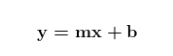

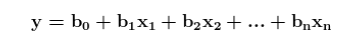

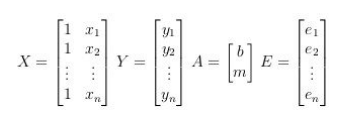

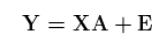

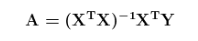

In [82]:
from dataclasses import dataclass

import numpy as np
import matplotlib.pyplot as plt

In [83]:
@dataclass
class ACoef:
    b: float
    m: float


@dataclass
class LeastSquares:
    x: np.ndarray
    y: np.ndarray
    a: ACoef

    @property
    def lstsq_line(self) -> np.ndarray:
        return self.a.m * self.x + self.a.b

In [84]:
def plot_least_squares(data: LeastSquares) -> None:
    plt.plot(
        data.x, 
        data.y, 
        'ko:', 
        label='Original', 
        markersize=5, 
        linewidth=2
    )
    plt.plot(
        data.x, 
        data.lstsq_line,
        'm', 
        label='Least squares'
    )
    plt.legend()
    plt.show()

## Matrix multiplication

In [85]:
def least_squares_by_matrix_mupltiplication(
    *,
    x: list[float] | None = None,
    y: list[float]
) -> LeastSquare:
    x = np.array(x) if x else np.linspace(0.1, 2, 20)
    print(f'{x=}')
    print(f'{y=}')

    x_matrix = np.hstack((
        np.ones(len(x)).reshape((len(x), 1)), 
        x.reshape((len(x), 1))
    ))
    y_matrix = np.array(y).reshape((len(y), 1))
    print(f'{x_matrix=}')
    print(f'{y_matrix=}')

#     a = (
#         np.linalg.inv(x_matrix.T.dot(x_matrix))
#         .dot(x_matrix.T)
#         .dot(y_matrix)
#     )

    x_matrix_t = x_matrix.T
    print(f'{x_matrix_t=}')
    x_matrix_t_on_x_matrix = x_matrix.T.dot(x_matrix)
    print(f'{x_matrix_t_on_x_matrix=}')
    inv = np.linalg.inv(x_matrix_t_on_x_matrix)
    print(f'{inv=}')
    x_matrix_t_on_y_matrix = x_matrix.T.dot(y_matrix)
    print(f'{x_matrix_t_on_y_matrix=}')
    a = inv.dot(x_matrix_t_on_y_matrix)
    print(f'{a=}')

    b, m = a[0][0], a[1][0]
    print(f'{b=}')
    print(f'{m=}')
    
    return LeastSquare(
        x=x,
        y=y,
        a=ACoef(
            b=b,
            m=m
        )
    )

## Numpy API

In [86]:
def least_squares_by_numpy_lstsq(
    *,
    x: list[float] | None = None,
    y: list[float]
) -> LeastSquare:
    x = np.array(x) if x else np.linspace(0.1, 2, 20)
    A = np.vstack([x, np.ones(len(x))]).T
    m, b = np.linalg.lstsq(A, y, rcond=None)[0]
    return LeastSquare(
        x=x,
        y=y,
        a=ACoef(
            b=b,
            m=m
        )
    )

## Plotting

In [87]:
s = '''
2.02
1.98
1.67
1.65
1.57
1.42
1.37
1.07
0.85
0.48
0.35
-0.30
-0.61
-1.20
-1.39
-1.76
-2.28
-2.81
-3.57
-4.06
'''

In [88]:
y = [float(i) for i in s.splitlines() if i]

### Matrix multiplication

In [89]:
least_squares_by_matrix_mupltiplication(y=y)

x=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])
y=[2.02, 1.98, 1.67, 1.65, 1.57, 1.42, 1.37, 1.07, 0.85, 0.48, 0.35, -0.3, -0.61, -1.2, -1.39, -1.76, -2.28, -2.81, -3.57, -4.06]
x_matrix=array([[1. , 0.1],
       [1. , 0.2],
       [1. , 0.3],
       [1. , 0.4],
       [1. , 0.5],
       [1. , 0.6],
       [1. , 0.7],
       [1. , 0.8],
       [1. , 0.9],
       [1. , 1. ],
       [1. , 1.1],
       [1. , 1.2],
       [1. , 1.3],
       [1. , 1.4],
       [1. , 1.5],
       [1. , 1.6],
       [1. , 1.7],
       [1. , 1.8],
       [1. , 1.9],
       [1. , 2. ]])
y_matrix=array([[ 2.02],
       [ 1.98],
       [ 1.67],
       [ 1.65],
       [ 1.57],
       [ 1.42],
       [ 1.37],
       [ 1.07],
       [ 0.85],
       [ 0.48],
       [ 0.35],
       [-0.3 ],
       [-0.61],
       [-1.2 ],
       [-1.39],
       [-1.76],
       [-2.28],
       [-2.81],
       [-3.57],
       [-4.06]])
x_matrix_t=array([[1. , 1. , 1. ,

LeastSquare(x=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]), y=[2.02, 1.98, 1.67, 1.65, 1.57, 1.42, 1.37, 1.07, 0.85, 0.48, 0.35, -0.3, -0.61, -1.2, -1.39, -1.76, -2.28, -2.81, -3.57, -4.06], a=ACoef(b=3.1386842105263115, m=-3.1582706766917266))

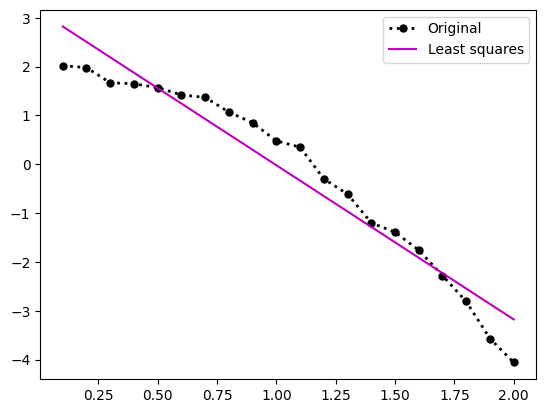

In [90]:
plot_least_squares(_)

### Numpy API

In [91]:
least_squares_by_numpy_lstsq(y=y)

LeastSquare(x=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]), y=[2.02, 1.98, 1.67, 1.65, 1.57, 1.42, 1.37, 1.07, 0.85, 0.48, 0.35, -0.3, -0.61, -1.2, -1.39, -1.76, -2.28, -2.81, -3.57, -4.06], a=ACoef(b=3.1386842105263173, m=-3.1582706766917297))

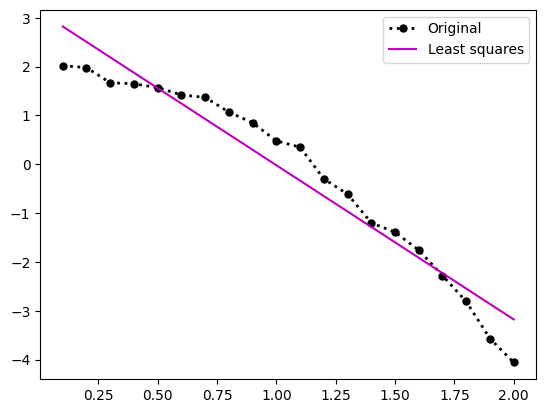

In [92]:
plot_least_squares(_)

## gaussian_filter1d

In [93]:
from scipy.ndimage import gaussian_filter1d

In [94]:
result = least_squares_by_matrix_mupltiplication(y=y)

x=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])
y=[2.02, 1.98, 1.67, 1.65, 1.57, 1.42, 1.37, 1.07, 0.85, 0.48, 0.35, -0.3, -0.61, -1.2, -1.39, -1.76, -2.28, -2.81, -3.57, -4.06]
x_matrix=array([[1. , 0.1],
       [1. , 0.2],
       [1. , 0.3],
       [1. , 0.4],
       [1. , 0.5],
       [1. , 0.6],
       [1. , 0.7],
       [1. , 0.8],
       [1. , 0.9],
       [1. , 1. ],
       [1. , 1.1],
       [1. , 1.2],
       [1. , 1.3],
       [1. , 1.4],
       [1. , 1.5],
       [1. , 1.6],
       [1. , 1.7],
       [1. , 1.8],
       [1. , 1.9],
       [1. , 2. ]])
y_matrix=array([[ 2.02],
       [ 1.98],
       [ 1.67],
       [ 1.65],
       [ 1.57],
       [ 1.42],
       [ 1.37],
       [ 1.07],
       [ 0.85],
       [ 0.48],
       [ 0.35],
       [-0.3 ],
       [-0.61],
       [-1.2 ],
       [-1.39],
       [-1.76],
       [-2.28],
       [-2.81],
       [-3.57],
       [-4.06]])
x_matrix_t=array([[1. , 1. , 1. ,

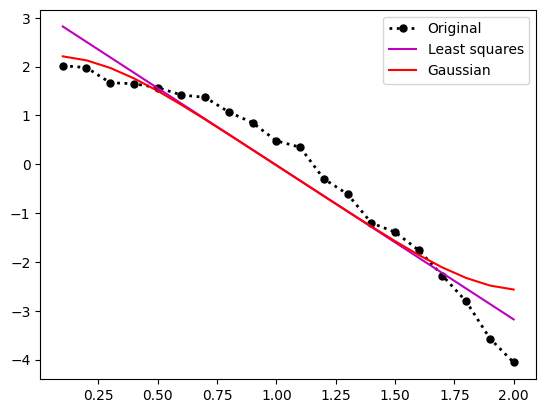

In [95]:
plt.plot(
    result.x, 
    result.y, 
    'ko:', 
    label='Original', 
    markersize=5, 
    linewidth=2
)
plt.plot(
    result.x, 
    result.lstsq_line, 
    'm', 
    label='Least squares'
)
plt.plot(
    result.x, 
    gaussian_filter1d(result.lstsq_line, 3),
    'r', 
    label='Gaussian'
)
plt.legend()
plt.show()